# Домашнее задание 2 (20 + 15 + 25 = 60 pts )

## Задача 1 (20 pts)

- (5 pts) Докажите, что $\mathrm{vec}(AXB) = (B^\top \otimes A)\, \mathrm{vec}(X)$, если $\mathrm{vec}(X)$ векторизация матрицы по столбцам. Что и почему изменится, если использовать векторизацию по строкам? 

- (2 pts) Какова сложность наивного вычислени $(A \otimes B) x$ и почему она такова? Покажите, как она может быть снижена.

- (3 pts) Пусть матрицы $A$ и $B$ имеют спектральные разложения $A = S_A\Lambda_A S_A^{-1}$ и $B = S_B\Lambda_B S^{-1}_B$. Найдите собственные векторы и собственные значения у матрицы $A\otimes I + I \otimes B$.

- (10 pts) Пусть $A = \mathrm{diag}\left(\frac{1}{1000},\frac{2}{1000},\dots \frac{999}{1000}, 1, 1000 \right)$. Оцените аналитически число итераций необходимых для решения линейной системы с матрицей $A$ с относительной точностью $10^{-4}$ используя
    - метод Ричардсона с оптимальным параметром (используйте евклидову норму)
    - метод Чебышёва (используйте евклидову норму)
    - метод сопряжённых градиентов (используйте $A$-норму).
    
и сравните вашу оценку с экспериментальными результатами.

1) Пусть матрица $B = [b_1, b_2 ... b_n]$ размером $m*n$, $X = [x_1, x_2 ... x_n]$. Тогда $k$-ая колонка $AXB$: $(AXB)_{:,k}=AXb_k=A\sum_{i=1}^m x_{i}b_{i, k}$ = [$b_{1,k}A$, $b_{2,k}A$...$b_{m,k}A$] [$(x_1, x_2, ... x_m)^T$] = ($ [b_{1,k}, b_{2,k} ... b_{m,k}]\otimes A$)$vec(X)$

Теперь рассмотрим выражение: $vec(AXB)=$$ 
      \begin{bmatrix} 
        (AXB)_{:,1} \\ 
        (AXB)_{:,2} \\
        ... \\
        (AXB)_{:,n}\\ 
      \end{bmatrix} vec(X)=(B^T\otimes A)vec(X)$ ч.т.д.

Если использовать векторизацию по строкам, то при аналогичном рассмотрении мы получим: $\mathrm{vec}(AXB) = (A \otimes B^T)\, \mathrm{vec}(X)$

2)Если $A$ — матрица размера $m*n$, $B$ — матрица размера $p*q$, тогда произведение Кронекера есть блочная матрица размера $mp*nq$. Произведение $a_{1,1}$ на $B$ требует $O(n^2)$ операций, таких операций нужно сделать $O(n^2)$ => суммарно: $\approx O(n^4)$
Воспользуемся формулой, которую мы доказали выше:
$ (A \otimes B) x = vec(B X A^T) $, где X - это вектор x, который мы преобразовали в матрицу. Чтобы преобразовать Vec(X) в X требуется $O(n)$ операций, для перемножения матриц - $O(n^3)$, таких перемножений у нас 2, $=>$ количество операций $ \approx 2*O(n^3)$, что меньше чем $O(n^4)$.<br/>

3) Воспользуемся свойством произведения Кронекера: $A \oplus B = A\otimes I + I \otimes B$, => исходя из того, что равенство равно прямой сумме  $A \oplus B$, получаем, что собсвенные значения равны: = $(\alpha_i+\beta_j)$, где $\alpha_i$ и $\beta_j$ - это всевозможные собственные значения $A, B$ , а собственные вектора $A \oplus B$ - это $a \otimes b$, где a, b - собственные векторы, которые соответствуют собственным значениям $\alpha_i$ и $\beta_j$. 

Изходя из написанного выше получаем, что собственные значедия $A\otimes I + I \otimes B$ - всевозможные суммы каждого элемента диагонали $\Lambda_A$ и $\Lambda_B$, а собственные вектора - множество произведений Кронекера между всеми столбцами $S_A$ и $S_B$.

4.1) Метод Ричардсона с оптимальным параметром:

Пусть $x_*$ решение, введём вектор ошибки $e_k = x_{k} - x_*$, 

$$\|e_{k+1}\|_2 \leq q \|e_k\|_2 , \quad\rightarrow \quad \|e_k\|_2 \leq q^{k} \|e_0\|_2,$$, пусть $x_0=\vec{0}$
 

где 

$$ q = \frac{\lambda_{\max} - \lambda_{\min}}{\lambda_{\max} + \lambda_{\min}} ,  $$ следовательно рассчитаем $q = \frac{999.999}{1000.001}$. 

Найдем такое k, что $q^k \approx 10^{-4}$,=> к = 4605171



In [1]:
import numpy as np
q = 999.999 / 1000.001
k = np.log(10**(-4)) / np.log(q)
print(k)

4605170.1860125


Эксперементально:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg as spla
import scipy
from scipy.sparse import csc_matrix

res_richardson = []
A = np.arange(1, 1000, 1)/1000
A = np.append(A, 1)
A = np.append(A, 1000)
n = len(A)
A = sp.sparse.spdiags(A, [0], n, n, 'csr'); 
ev1, vec = spla.eigsh(A, k=2, which='LA')
ev2, vec = spla.eigsh(A, k=2, which='SA')
lam_max = ev1[0]
lam_min = ev2[0]
rhs = np.ones(n)
tau_opt = 2.0/(lam_max + lam_min)
x = np.full(n, 1/1000)
k = 0
rr=10
niters = 10
while (np.linalg.norm(rr)>=1e-4):
    rr = A.dot(x) - rhs
    x = x - tau_opt * rr
    res_richardson.append(np.linalg.norm(rr))
    k+=1;

In [3]:
print("количество итераций: ", k)
print("проверка :", A.dot(x))

количество итераций:  4780
проверка : [0.99992951 1.         1.         ... 1.         0.99992958 1.        ]


Эксперементально сходится намного быстрее.



4.2) Метод Чебышёва:

$e_{k+1} \leq C q^k e_0$, $\quad q = \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1}$, => $ q = \frac{\sqrt{\frac{1000}{\frac{1}{1000}}}-1}{\sqrt{\frac{1000}{\frac{1}{1000}}}+1} = \frac{999}{1001}$

Аналогично найдем k: k = 4605

In [4]:
q = 999 / 1001
k = np.log(10**(-4)) / np.log(q)
print(k)

4605.168650930853


Эксперимент:

In [5]:
niters = 4605
roots = [np.cos((np.pi * (2 * i + 1)) / (2 * niters)) for i in range(niters)]
taus = [(lam_max + lam_min - (lam_min - lam_max) * r) / 2 for r in roots]
x = np.full(n, 1/1000)
r = A.dot(x) - rhs
res_cheb = [np.linalg.norm(r)]


good_perm = [i for i in range(1, niters+1)]
i = 0
while (np.linalg.norm(r)>=1e-4):
    x = x - 1.0/taus[good_perm[i] - 1] * r
    r = A.dot(x) - rhs
    i+=1;

C:\Users\lasic\Anaconda3\envs\coursera_ds\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in multiply
  if sys.path[0] == '':
C:\Users\lasic\Anaconda3\envs\coursera_ds\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in subtract
  if sys.path[0] == '':


In [6]:
print("количество итераций: ", i)
print("проверка :", A.dot(x))

количество итераций:  3333
проверка : [0.99820994 0.99999685 0.99999999 ... 1.         1.         1.        ]


Эксперементально сходится намного быстрее.




4.3) Метод сопряженных градиентов:
 $
    \inf_{q, q(0)=1} \max_{j} |q({\lambda_j})| \leq \inf_{q, q(0)=1} \max_{\lambda\in[\lambda_\min,\lambda_\max]} |q({\lambda})|
$, => используя результат, используемый в методе Чебышёва, получим такую же скорость сходимости:

$$\frac{\Vert x_k - x_* \Vert_A }{\Vert x_* \Vert_A} \leq \gamma \left( \frac{\sqrt{\mathrm{cond}(A)}-1}{\sqrt{\mathrm{cond}(A)}+1}\right)^k.$$
    Данный метод сойдется за такое же число итераций равных 4606.

Эксперемнтально:

In [7]:
x = np.ones(n)
x0 = x
g0 = A.dot(x) - rhs
d0 = -g0
k = 0
while (np.linalg.norm(g0)>=1e-4):
    x1 = x0 + (g0.dot(g0)/(d0.dot(A.dot(d0))))*d0
    g1 = A.dot(x1) - rhs
    d1 = -g1 + (g1.dot(g1)/g0.dot(g0))*d0

    x0 = x1
    g0 = g1
    d0 = d1
    k+=1

In [8]:
print("количество итераций: ", k)
print("проверка :", A.dot(x1))

количество итераций:  173
проверка : [1.         1.00000005 0.99999961 ... 1.00000005 1.         1.0000167 ]


Эксперементально сходится намного быстрее.


## Задача 2 (15 pts)

### Спектральное разбиение графа и обратная итерация


Дан связный граф $G$ и соответствующий ему лапласиан $L = D - A$ с собственными значениями  $0=\lambda_1, \lambda_2, ..., \lambda_n$, где $D$ диагональная матрица со степенями вершин на диагонали, а $A$ – матрица смежности.
Вектор Фидлера – это собственный вектор, соответствующий собственному значению $\lambda_2$ матрицы $L$. Этот вектор может быть использован для разбиения графа: положительные значения соответствуют одной части графа, отрицательные – другой.

### Метод обратной итерации

Для поиска вектора Фидлера мы будем использовать метод Релея.

* (5 pts) Выпишите матрицу ортопроектора на подпространство ортогональное собственному вектору матрице $L$, соответствующему собственному значению $0$ и докажите (аналитически), что это действительно ортопроектор.
 
* (5 pts) Реализуйте функцию спектрального разделения графа ```partition```:

1) $L_{ii}$ = степень вершины $i$, $L_{ij}=−1$,если $i≠j$ и существует ребро, и $0$ иначе. Следовательно строчные суммы в матрице $L$ равны нулю, поэтому существует собственное значение $0$, которое даёт собственный вектор из всех 1.

Следовательно $\vec{x}={(1,1,...,1)}^T$ - это собственный вектор, который соответствует собственному значению $0$. Подпространство ортогональное к данному вектору является гиперплоскость, которая задается уравнением $\sum_{i=1}^{n}z_i=0$. Вычислим ортогональную проекцию вектора $\vec{a}$ на данную гиперплоскость:

$$ Pr(\vec{a}) = \vec{a} -  \frac{(\vec{a}*\vec{n})}{|\vec{n}|*|\vec{n}|}\vec{n} => Pr(\vec{a}) = a - \frac{a^T*I}{I^T*I}I = a - \frac{II^Ta}{n} = (I_n - \frac{II^T}{n})a$$

 Следовательно матрица ортопроектора равна: $A = (I_n - \frac{II^T}{n})$, где $I_n$ - это единичная матрица ранга n, а $I$ - единичный вектор.

 Аналитическая проверка: $I^TPr(\vec{a})=(I^T - \frac{I^TII^T}{n})a = (I^T-I^T)a=0$

In [9]:
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix
from scipy.sparse import identity
from scipy.sparse import diags
import numpy as np
from numpy import linalg
from scipy import sparse

In [10]:
# INPUT:
# A - adjacency matrix (scipy.sparse.csr_matrix)
# num_iter_fix - number of iterations with fixed shift (float)
# shift - (float number)
# num_iter_adapt - number of iterations with adaptive shift (int) -- Rayleigh quotient iteration steps
# x0 - initial guess (1D numpy.ndarray)
# OUTPUT:
# x - normalized Fiedler vector (1D numpy.ndarray)
# eigs - eigenvalue estimations at each step (1D numpy.ndarray)
# eps - relative tolerance (float)
def partition(A, shift, num_iter_fix, num_iter_adapt, x0, eps):
    A = A.toarray() 
    n = A.shape[0]
    D = csr_matrix((np.array(A.sum(axis=1)), (range(n), range(n))), shape=(n, n)) 
    L = A + D
    x = x0
    #начальное приближение:  
    #I = np.ones(n)
    #x = x0 - (x0.dot(I)/I.dot(I))*x0

    for i in range(n):
      for j in range(n):
        if(i != j):
          if(L[i,j] != 0):
            L[i,j] =-1
    L = sparse.csr_matrix(L)
    eigs = []

    for i in range(0, int(num_iter_fix)):
       shift = 1.0
       y = spsolve(L - shift * np.identity(n), x)
       x = y / linalg.norm(y)
       eigval = (L @ x) @ x / linalg.norm(x) ** 2
       eigs.append(eigval)
       if (i!=0):
          if (linalg.norm(eigs[i]-eigs[i-1])/linalg.norm(eigs[i])<=eps):
            eps = linalg.norm(eigs[i]-eigs[i-1])/linalg.norm(eigs[i])
            return x, eigs, eps


    for i in range(0, num_iter_adapt):
       shift = (L @ x) @ x/(linalg.norm(x) ** 2)
       y = spsolve(L - shift * np.identity(n), x)
       x = y / linalg.norm(y)
       eigval = (L @ x) @ x / linalg.norm(x) ** 2
       eigs.append(eigval)
       if (i!=0):
          if (linalg.norm(eigs[i+num_iter_fix]-eigs[i+num_iter_fix-1])/linalg.norm(eigs[i+num_iter_fix])<=eps):
            eps = linalg.norm(eigs[i+num_iter_fix]-eigs[i+num_iter_fix-1])/linalg.norm(eigs[i+num_iter_fix])
            break;


    return x, eigs, eps 

Алгоритм должен останавливаться спустя `num_iter_fix + num_iter_adapt` итераций или если выполнено следующее соотношение

$$ \boxed{\|\lambda_k - \lambda_{k-1}\|_2 / \|\lambda_k\|_2 \leq \varepsilon} \text{ на некотором шаге } k.$$

Не забудьте использовать ортогональную проекцию из задачи выше в итерационном процессе, чтобы получить верный собственный вектор.
Также хорошей идеей могло быть использование ```shift=0``` до запуска адаптивного режима. Однако это невозможно в силу вырождннности матрицы $L$, а разреженное разложенное в ```scipy``` не работет в этом случае. Поэтому вместо нулевого сдвига предлагается использовать некоторое малое значение.

* (3 pts) Сгенерируйте случайный `lollipop_graph`, используя библиотеку `networkx`, и найдите его разбиение. [Нарисуйте](https://networkx.github.io/documentation/networkx-1.9/examples/drawing/labels_and_colors.html) этот граф с вершинами, окрашенными в соответствии с разбиением.

* (2 pts) Запустите метод со случайного начального приближение ```x0```, установите ```num_iter_fix=0``` и объясните, почему метод может сойтись к неверному собственному значению?

1):

In [11]:
#Сгенерируем матрицу:
import networkx as nx

D = nx.lollipop_graph(10, 3)
A = nx.convert_matrix.to_numpy_matrix(D)


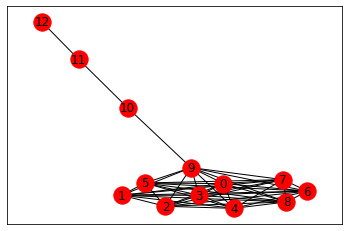

In [12]:
nx.draw_networkx(D, node_color="red") #Draw the graph

In [13]:
import scipy.sparse.linalg as spsl
from scipy.sparse.linalg import inv
sA = sparse.csr_matrix(A)
x = np.ones(sA.shape[0])

for i in range(len(x)):
  x[i]+= (10*np.random.random()-5)
  
#начальное приближение из пункта 1:   
I = np.ones(len(x))
x0 = x - (x.dot(I)/I.dot(I))*x

x, eigs, _ = partition(sA, 0, 6, 10, x0, 0.00001)
print(eigs)

[1.9916222626059699, 1.4455228914768412, 1.4974588635887696, 1.522401583273907, 1.5301847810886402, 1.5324684243936546, 1.5334185349516407, 1.5334185353270726]


C:\Users\lasic\Anaconda3\envs\coursera_ds\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
C:\Users\lasic\Anaconda3\envs\coursera_ds\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
C:\Users\lasic\Anaconda3\envs\coursera_ds\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
C:\Users\lasic\Anaconda3\envs\coursera_ds\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
C:\Users\lasic\Anaconda3\envs\coursera_ds\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEffi

Результат работы алгоритма:

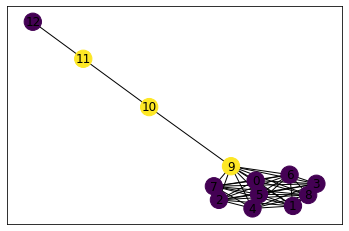

In [14]:
nx.draw_networkx(D, node_color=np.sign(x))

2) Запустим метод со случайным начальным приближением x0, установим num_iter_fix=0:

In [15]:
import scipy.sparse.linalg as spsl
from scipy.sparse.linalg import inv
sA = sparse.csr_matrix(A)
x = np.zeros(sA.shape[0])

#начальное приближение из пункта 1:  
for i in range(len(x)):
  x[i]= np.random.random()
 
I = np.ones(len(x))
x0 = x - (x.dot(I)/I.dot(I))*x

x, eigs, _ = partition(sA, 0, 0, 10, x0, 0.00001)
print(eigs)

[0.4153615618963009, 0.05212829418174338, 0.001305208561588218, 3.8059284224066275e-08, 5.234657510626112e-16, -6.46632976094008e-16, -3.6950455776800485e-16, 3.079204648066715e-16, 7.698011620166789e-16, -1.5396023240333505e-16]


C:\Users\lasic\Anaconda3\envs\coursera_ds\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
C:\Users\lasic\Anaconda3\envs\coursera_ds\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
C:\Users\lasic\Anaconda3\envs\coursera_ds\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
C:\Users\lasic\Anaconda3\envs\coursera_ds\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEfficiencyWarning)
C:\Users\lasic\Anaconda3\envs\coursera_ds\lib\site-packages\scipy\sparse\linalg\dsolve\linsolve.py:138: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  SparseEffi

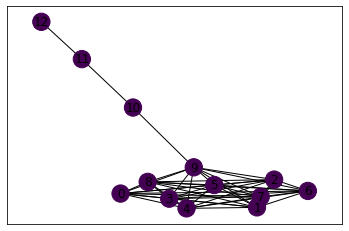

In [16]:
nx.draw_networkx(D, node_color=np.sign(x))

Если мы не используем в качестве начального приближения проекцию вектора на подпространство ортогональное собственному вектору матрице  L , соответствующему собственному значению  0, то partition() находит собственное значение равное 0 и собственный вектор соответствующий данному значению, а нам нужен именно 2-ой минимум для решения задачи.

## Задача 3 (25 pts)

## PageRank для DBLP


#### Введение дэмпфирующего фактора

* (5 pts) Напишите функцию ```pagerank_matrix(G)```, которая из поданной на вход матрицы смежности $G$ (в плотном или разреженном форматах) создаёт и возвращает матрицу PageRank'a $A$.

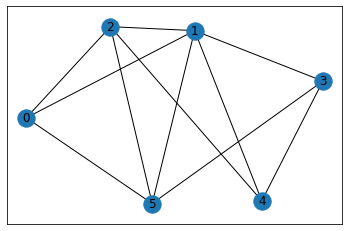

In [17]:
import numpy as np
import networkx as nx
#генерация случайного графа:
def create_graph(n):
  A = np.random.randint(0, 2, size=(n, n)).astype("float")
  for i in range(len(A)):
    A[i,i]=0
  D = nx.Graph(A) 
  return A, D    

A, D = create_graph(6)
nx.draw_networkx(D)

In [18]:
import copy
# INPUT:  G - np.ndarray or sparse matrix
# OUTPUT: A - np.ndarray (of size G.shape) or sparse matrix
def pagerank_matrix(G):
    # enter your code here
    rows, cols = G.nonzero()
    P = copy.copy(G)
    norm = np.zeros(G.shape[0])
    
    for i in range(len(cols)):
      norm[cols[i]]+=P[rows[i], cols[i]]
    for i in range(len(cols)):
      P[rows[i], cols[i]] = P[rows[i], cols[i]] / norm[cols[i]]

    return P

In [19]:
print(A)
answ = pagerank_matrix(A)
print(answ)


[[0. 1. 1. 0. 0. 1.]
 [0. 0. 1. 1. 0. 1.]
 [0. 1. 0. 0. 1. 1.]
 [0. 0. 0. 0. 1. 1.]
 [0. 1. 1. 1. 0. 0.]
 [1. 1. 1. 1. 0. 0.]]
[[0.         0.25       0.25       0.         0.         0.25      ]
 [0.         0.         0.25       0.33333333 0.         0.25      ]
 [0.         0.25       0.         0.         0.5        0.25      ]
 [0.         0.         0.         0.         0.5        0.25      ]
 [0.         0.25       0.25       0.33333333 0.         0.        ]
 [1.         0.25       0.25       0.33333333 0.         0.        ]]


* (5 pts) Реализуйте степенной метод для заданной матрицы $A$, начального вектора $x_0$ и числа итераций```num_iter``` в соответствии с прототипом ниже. Функция возвращает оценку собственного вектора, собственного значения и нормы невязки при сходимости. Проверьте, что ваша реализация сходится для матрицы $\begin{bmatrix} 2 & -1 \\ -1 & 2 \end{bmatrix}$.

In [20]:
# INPUT:  A - np.ndarray (2D), x0 - np.ndarray (1D), num_iter - integer (positive)
# OUTPUT: x - np.ndarray (of size x0), l - float, res - np.ndarray (of size num_iter + 1 [include initial guess])
def power_method(A, x0, num_iter): # 5 pts
    # enter your code here
    res = []
    x = x0
    for i in range(0, num_iter):
       x = A @ x0 /(linalg.norm(A@x0))
       x0 = x
       m = x @ (A @ x)/(linalg.norm(x)) 
       res = np.append(res, m)
    l = linalg.norm(A@x - x *((A @ x) @ x)/(linalg.norm(x) ** 2))
    return x, l, res

In [21]:
A = np.array([[2, -1], [-1, 2]])

a = np.ones(A.shape[0])
for i in range(len(a)):
  a[i]+= (10*np.random.random()-5)

x, l, res = power_method(A, a, 20)

print("собственное значение: ", res[-1])
print("невязка: ", l)


собственное значение:  3.0
невязка:  9.505716567061659e-11


Для избежания проблем со сходимостью степенного метода, обсуждённых на семинаре, можно ввести дэмпфирующий фактор и преобразовать матрицу PageRank'a следующим образом:

$$
A_d = dA + \frac{1-d}{N} \begin{pmatrix} 1 & \dots & 1 \\ \vdots & & \vdots \\ 1 & \dots & 1 \end{pmatrix},
$$

где $d$ малый параметр из отрезка $[0,1]$ (обычно $d=0.85$), который называется **демпфирующим фактором**, $A$ размера $N\times N$. После такого преобразования максимальное собственное значение матрицы $A_d$ обладает кратностью равной 1. 

Именно это [предложили](http://ilpubs.stanford.edu:8090/422/1/1999-66.pdf) сделать Ларри Пейдж и Сергей Брин для получения своего алгоритма ранжирвания веб-страниц.


* (4 pts) Реализуйте функцию быстрого умножения матрицы $A_d$ на вектор в соответствии с прототипом ниже ```pagerank_matvec(A, d, x)```. На вход функция принимает  матрицу PageRank'a $A$ (в разреженном формате, например ```csr_matrix```), демпфирующий фактор $d$ и начальный вектор $x$, а возвращает $A_dx$. 

In [22]:
# INPUT:  A - np.ndarray (2D), d - float (from 0.0 to 1.0), x - np.ndarray (1D, size of A.shape[0/1])
# OUTPUT: y - np.ndarray (1D, size of x)
def pagerank_matvec(A, d, x): # 2 pts
    # enter your code here
    n = A.shape[0]
    A = d * A   
    rows, cols = A.nonzero()
    
    element = sum(x)*(1-d)/n
    y_1 = np.full(n, element) 
    
    y = np.zeros(n)
    for i in range(len(rows)):
      y[rows[i]] += A[rows[i], cols[i]] * x[cols[i]]

    return y + y_1

In [23]:
x = np.ones(A.shape[0])
print(pagerank_matvec(A, 0.85, x))
d = 0.85 
n = A.shape[0]

[1. 1.]



* (2 pts) Сгенерируйте случайную матрицу смежности $1000 \times 1000$ (если помещается в память, то увеличьте размер до $10000 \times 10000$) со 100 ненулевыми элементами и сравните время вычисления произведения матрицы и случайного вектора с помощью ```pagerank_matvec``` и явным вычислением $A_dx$.
    
Загрузите данные [отсюда](https://goo.gl/oZVxEa), разархивируйте и поместите файлы `dblp_authors.npz`  и `dblp_graph.npz` в папку рядом с этим ноутбуком. Каждое значение (имя автора) из `dblp_authors.npz` соответствует строке/столбцу в матрице из  `dblp_graph.npz`. Значения в строке `i` и столбце `j` матрицы `dblp_graph.npz` соответствуют числу раз, которое автор `i` цитировал статьи автора `j`. Давайте теперь найдём наиболее влиятельных авторов по величине Pagerank'a на основе данных DBLP.

* (5 pts) Загрузите взвешенную матрицу смежности и список авторов с помощью функции ```load_dblp(...)```. Выведите её плотность, то есть отношение числа ненулевых элементов к общему числу элементов. Найдите top-10 наиболее цитируемых авторов по значениям элементов этой матрицы. Далее сделайте все элементы равными 1 для простоты. Получите матрицу Pagerank'a из матрицы смежности и проверьте её стохастичность (сумма элементов по строкам/столбцам равна 1).
 
* (1 pts) Для того чтобы передать функцию ```pagerank_matvec``` в функцию ```power_method``` для быстрого вычисления матрично-векторного произведения $A_dx$, вы можете сделать ```LinearOperator```: 
```python
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))
```
Вызов ```L@x``` или ```L.dot(x)``` будет реализован путём вызова функции ```pagerank_matvec(A, d, x)```, таким образом, вы можете передать $L$ вместо матрицы $A$ в функцию ```power_method``` напрямую.


* (2 pts) Запустите степенной метод начиная с вектора из всех 1 и нарисуйте норму невязок $\|A_dx_k - \lambda_k x_k\|_2$  как функцию от $k$ для $d=0.85$.


* (1 pts) Выведите имена top-10 авторов по величине PageRank'a на основании графа DBLP с $d=0.85$. Прокомментируйте результат и сарвните его со списком наиболее цитируемых авторов.

1) Сгенерируйте случайную матрицу смежности  1000×1000:

In [24]:
#сгенерируем матрицу:
def random_generation(n):
  M = np.zeros((n, n))
  ind = 0
  while(ind!=100):
    i = np.random.randint(0, n-1, 1)[0]
    j = np.random.randint(0, n-1, 1)[0]
    if(i!=j and M[i, j]==0):
      M[i, j]=1
      ind+=1
  return M  

def explicit_mul(A, d, x):
  n = A.shape[0]
  A = d*A + np.ones((n,n))*(1-d)/n
  answ = np.zeros(n)
  for i in range(n):
    for j in range(n):
      answ[i] += A[i,j]*x[j]
  return answ

In [25]:
#Проверим количество ненулевых элементов:
A = random_generation(10000)
rows, cols = A.nonzero()
print(sum(A[rows, cols]))

100.0


In [ ]:
#Сравним время:
import time

x = np.ones(A.shape[0])

start_time = time.time()
answ = pagerank_matvec(A, 0.85, x)
end_time = time.time()
print("Быстрое умножение: ", end_time - start_time)

start_time = time.time()
answ = explicit_mul(A, 0.85, x)
end_time = time.time()
print("Наивное умножение: ", end_time - start_time)


Быстрое умножение:  1.0730693340301514
Наивное умножение:  71.20149803161621


Разница ощутима.

2)

In [26]:
from scipy.sparse import load_npz
import numpy as np
def load_dblp(path_auth, path_graph):
    G = load_npz(path_graph).astype(float)
    with np.load(path_auth) as data: authors = data['authors']
    return G, authors
G, authors_ = load_dblp('dblp_authors.npz', 'dblp_graph.npz')

In [54]:
#из-за того, что считается очень долго я понизил размерность
G = G[:10000, :10000]
authors_ = authors_[:10000] 

In [55]:
G.shape

(1000, 1000)

In [56]:
rows, cols = G.nonzero()

In [57]:
#Выведите плотность, то есть отношение числа ненулевых элементов к общему числу элементов:
answ = np.zeros(G.shape[0])
for i in range(len(cols)):
    answ[cols[i]] += G[rows[i], cols[i]]
print("Плотность: ", len(cols)/(G.shape[0]**2))

Плотность:  0.000159


In [58]:
#найдем топ 10 наиболее цитируемых писателей:
import copy
top_10 = copy.copy(answ)
authors = []
maximum = 0
for i in range(10):
  maximum = max(top_10)
  for i in range(len(top_10)):
    if(top_10[i]==maximum):
      authors.append(i)
      top_10[i] = -1
      break;

In [59]:
print(authors)

[2, 26, 29, 36, 46, 47, 48, 54, 58, 65]


In [60]:
#топ авторов:
print(authors_[authors])

['(TYPE=name) (SCHEME=Vancouver) Kahn Ce' 'A Aart Blokhuis' 'A Aerts'
 'A Ahsan Shabbir' 'A Alejandro Montes Garcia' 'A Aleksandra Kuzmanovska'
 'A Alessandro Becciu' 'A Alper Denasi' 'A Ambra Trotto'
 'A Andrei Korostelev']


In [61]:
# заменим значения на 1-цы:
New_mat = copy.copy(G)
rows, cols = New_mat.nonzero()
for i in range(len(cols)):
    New_mat[rows[i], cols[i]]= 1

In [62]:
# Получим матрицу Pagerank'a из матрицы смежности и проверем её стохастичность
PG = pagerank_matrix(New_mat)
rows, cols = PG.nonzero()
checker = np.zeros(New_mat.shape[0])
for i in range(len(rows)):
  checker[cols[i]]+=PG[rows[i], cols[i]]
ind = checker.nonzero()
#проверка (должно =1)
print(sum(checker[ind])/len(ind[0]))

1.0


3):

In [63]:
import scipy 
A = copy.copy(PG)
L = scipy.sparse.linalg.LinearOperator(A.shape, matvec=lambda x, A=A, d=d: pagerank_matvec(A, d, x))

4):

In [64]:
a = np.ones(A.shape[0])
discrepancy = []
d = 0.85
k = np.arange(1, 30)
for i in k:
  x, l, res = power_method(L, a, i)
  discrepancy.append(linalg.norm(L@x - res[-1]*x))  

Text(0, 0.5, 'k')

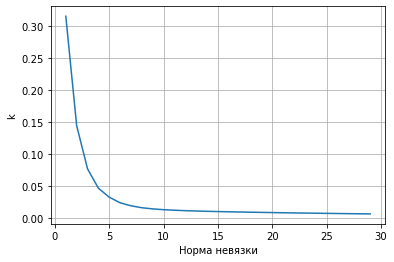

In [37]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(k, discrepancy)
ax.grid()

ax.set_xlabel('Норма невязки')
ax.set_ylabel('k')

5)

In [65]:
import copy
top_10 = copy.copy(x)
authors__ = []
maximum = 0
for i in range(10):
  maximum = max(top_10)
  for i in range(len(top_10)):
    if(top_10[i]==maximum):
      authors__.append(i)
      top_10[i] = -1
      break;

In [66]:
print(authors)
print(authors__)

[2, 26, 29, 36, 46, 47, 48, 54, 58, 65]
[536, 507, 442, 718, 2, 26, 29, 36, 46, 47]


In [67]:
print(authors_[authors])
print(authors_[authors__])

['(TYPE=name) (SCHEME=Vancouver) Kahn Ce' 'A Aart Blokhuis' 'A Aerts'
 'A Ahsan Shabbir' 'A Alejandro Montes Garcia' 'A Aleksandra Kuzmanovska'
 'A Alessandro Becciu' 'A Alper Denasi' 'A Ambra Trotto'
 'A Andrei Korostelev']
['A R Vafaeinezhad' 'A Peters' 'A Min Tjoa' 'A-Long Jin'
 '(TYPE=name) (SCHEME=Vancouver) Kahn Ce' 'A Aart Blokhuis' 'A Aerts'
 'A Ahsan Shabbir' 'A Alejandro Montes Garcia' 'A Aleksandra Kuzmanovska']


Как мы видим значения похожи;